In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [9]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [4]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
df.shape

(42, 2)

In [13]:
df['Quarter'].value_counts().sum()

42

In [14]:
quar=['Q1','Q2','Q3','Q4']

In [15]:
p=df['Quarter'][0]

In [20]:
p[0:2]

'Q1'

In [22]:
df['quar']=0

In [23]:
for i in range(42):
    p = df["Quarter"][i]
    df['quar'][i]= p[0:2]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
df.head()

,Quarter,Sales,quar
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [54]:
quar_dummies = pd.DataFrame(pd.get_dummies(df['quar']))
df1 = pd.concat([df,quar_dummies],axis = 1)

In [55]:
df1.head()

,Quarter,Sales,quar,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [56]:
df1["t"] = np.arange(1,43)

In [57]:
df1["t_squared"] = df1["t"]*df1["t"]

In [58]:
df1.columns

Index(['Quarter', 'Sales', 'quar', 'Q1', 'Q2', 'Q3', 'Q4', 't', 't_squared'], dtype='object')

In [59]:
df1['log_Sales']=np.log(df1['Sales'])

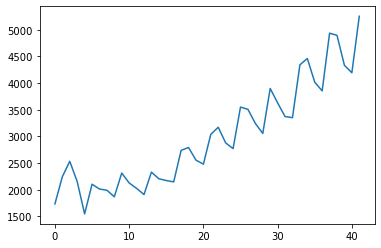

In [60]:
df1.Sales.plot()

In [61]:
Train=df1.head(32)
Test=df1.tail(10)

In [62]:
import statsmodels.formula.api as smf

In [63]:
#Linear model

In [64]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767115

In [65]:
#Exponential

In [66]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

590.3316432076576

In [67]:
#Quadratic

In [68]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573554072897

In [69]:
#Additive Seasonality

In [70]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

In [71]:
#Additive seasonality quadratic

In [73]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.35107711286446

In [74]:
#Multiplicative Seasonality

In [75]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948361168

In [76]:
#Multiplicative additive seasonality

In [77]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.8678182691964

In [78]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,752.923393
1,rmse_Exp,590.331643
2,rmse_Quad,457.735736
3,rmse_add_sea,1850.466546
4,rmse_add_sea_quad,277.351077
5,rmse_Mult_sea,1908.250395
6,rmse_Mult_add_sea,448.867818


In [79]:
#Least rmse if of Additive seasonality quadratic model

In [80]:
#We will use Additive seasonality quadratic model for forecasting

# Airline passengers

In [81]:
df=pd.read_excel('Airlines+Data.xlsx')

In [82]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [92]:
df.shape

(96, 3)

In [84]:
df['Month'].head()

0   1995-01-01
1   1995-02-01
2   1995-03-01
3   1995-04-01
4   1995-05-01
Name: Month, dtype: datetime64[ns]

In [85]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [136]:
p1 = df["Month"][0]
p1.month

1

In [116]:
df['months']=0

In [137]:
for i in range(96):
    p1 = df["Month"][i]
    df['months'][i]= p1.month

In [138]:
df.head()

,Month,Passengers,months
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5


In [140]:
month_dummies = pd.DataFrame(pd.get_dummies(df['months']))
df1 = pd.concat([df,month_dummies],axis = 1)

In [141]:
df1.head()

,Month,Passengers,months,1,2,3,4,5,6,7,8,9,10,11,12
0,1995-01-01,112,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,0,0,0,0,1,0,0,0,0,0,0,0


In [142]:
df1["t"] = np.arange(1,97)
df1["t_squared"] = df1["t"]*df1["t"]
df1.columns

Index([     'Month', 'Passengers',     'months',            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                't',  't_squared'],
      dtype='object')

In [143]:
df1["log_pass"] = np.log(df1["Passengers"])

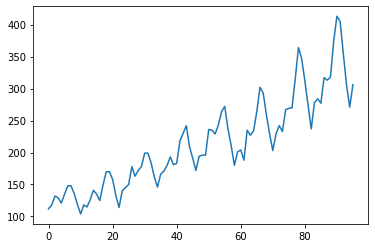

In [144]:
df1.Passengers.plot()

In [145]:
Train = df1.head(75)
Test = df1.tail(21)

In [146]:
Train.head()

,Month,Passengers,months,1,2,3,4,5,6,7,8,9,10,11,12,t,t_squared,log_pass
0,1995-01-01,112,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [147]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

56.02331097092629

In [148]:
Exp = smf.ols('log_pass~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

45.47042515863835

In [149]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.491134686628264

In [160]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,56.023311
1,rmse_Exp,45.470425
2,rmse_Quad,58.491135


In [161]:
#Exp has less rmse so we can use exponential model for forecsting